![](https://insights-on.com/wp-content/uploads/2021/04/netflix-data-challenge-dashboard_3.jpg)

## <p style="text-align: center;"><span style="color:red">Netflix Data Analysis [Beginner]</span></p>

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows' 
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sankhadeepkundu
Your Kaggle Key: ········


100%|██████████| 1.34M/1.34M [00:00<00:00, 79.9MB/s]

In [3]:
import pandas as pd
import numpy as np

In [4]:
full_data_df = pd.read_csv('dataset-netflix-shows/netflix_titles.csv')
full_data_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
full_data_df['title'][8806]

'Zubaan'

Trying to change the column -- *duration* to integer format in a duplicate df.

In [6]:
copy_data=full_data_df.copy()
top_10_copy = copy_data.head(10)

In [7]:
top_movie_df = top_10_copy[top_10_copy.type == 'Movie']
demo_df = top_movie_df[['show_id','duration']]
demo_df

,show_id,duration
0,s1,90 min
6,s7,91 min
7,s8,125 min
9,s10,104 min


In [8]:
for id in demo_df.index:
    x = demo_df.at[id,'duration']
    temp = int(x.split()[0])
    demo_df.at[id,'duration'] = temp

In [9]:
demo_df

,show_id,duration
0,s1,90
6,s7,91
7,s8,125
9,s10,104


Changed duration column to integer format

In [10]:
top_movie_df[demo_df.duration>90][['show_id', 'title', 'director', 'release_year', 'cast', 'duration']]

,show_id,title,director,release_year,cast,duration
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",2021,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",91 min
7,s8,Sankofa,Haile Gerima,1993,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",125 min
9,s10,The Starling,Theodore Melfi,2021,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",104 min


In [11]:
top_10_copy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
movie_df = top_10_copy[top_10_copy.type == 'Movie']
movie_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [15]:
release_2021_df = full_data_df[full_data_df['release_year']==2021]
release_2021_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
1468,s1469,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
1551,s1552,TV Show,Hilda,NaN,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States","December 14, 2020",2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend..."
1696,s1697,TV Show,Polly Pocket,NaN,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland","November 15, 2020",2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...
2920,s2921,TV Show,Love Is Blind,NaN,"Nick Lachey, Vanessa Lachey",United States,"February 13, 2020",2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...


In [16]:
movie_2021_df = release_2021_df[release_2021_df['type']=='Movie']
movie_2021_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
...,...,...,...,...,...,...,...,...,...,...,...,...
1425,s1426,Movie,Creating The Queen's Gambit,NaN,NaN,United States,"January 8, 2021",2021,TV-14,14 min,Documentaries,A fascinating character. Exquisite sets. A wig...
1431,s1432,Movie,Stuck Apart,NaN,"Engin Günaydın, Haluk Bilginer, Binnur Kaya, Ö...",Turkey,"January 8, 2021",2021,TV-MA,97 min,"Comedies, Dramas, International Movies","Entrenched in a midlife crisis, Aziz seeks sol..."
1436,s1437,Movie,Ratones Paranoicos: The Band that Rocked Argen...,"Alejandro Ruax, Ramiro Martínez","Juan Sebastián Gutiérrez, Pablo Cano, Pablo Me...",NaN,"January 6, 2021",2021,TV-MA,76 min,"Documentaries, International Movies, Music & M...","The irrepressible Ratones Paranoicos, Argentin..."
1466,s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,"January 1, 2021",2021,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...


### Find movies directed in the US.

In [17]:
us_2021_movie_df = movie_2021_df[movie_2021_df.country == 'United States']
us_2021_movie_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
81,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
101,s102,Movie,Untold: Breaking Point,"Chapman Way, Maclain Way",NaN,United States,"September 7, 2021",2021,TV-MA,80 min,"Documentaries, Sports Movies",Under pressure to continue a winning tradition...
231,s232,Movie,The Water Man,David Oyelowo,"David Oyelowo, Rosario Dawson, Lonnie Chavis, ...",United States,"August 25, 2021",2021,PG,92 min,"Children & Family Movies, Dramas","Desperate to save his ailing mother, 11-year-o..."
247,s248,Movie,Sweet Girl,Brian Andrew Mendoza,"Jason Momoa, Isabela Merced, Manuel Garcia-Rul...",United States,"August 20, 2021",2021,R,110 min,"Action & Adventure, Dramas",He lost the love of his life to a pharmaceutic...
290,s291,Movie,Untold: Malice at the Palace,Floyd Russ,NaN,United States,"August 10, 2021",2021,TV-MA,70 min,"Documentaries, Sports Movies",Key figures from an infamous 2004 incident bet...
295,s296,Movie,The Paper Tigers,Quoc Bao Tran,"Alain Uy, Ron Yuan, Mykel Shannon Jenkins, Jae...",United States,"August 7, 2021",2021,PG-13,111 min,"Action & Adventure, Comedies","After reuniting as middle-aged men, three kung..."
307,s308,Movie,Aftermath,Peter Winther,"Ashley Greene, Shawn Ashmore, Sharif Atkins, B...",United States,"August 4, 2021",2021,TV-MA,115 min,Horror Movies,"Desperate to save their marriage, a young coup..."
317,s318,Movie,Pray Away,Kristine Stolakis,NaN,United States,"August 3, 2021",2021,PG-13,102 min,"Documentaries, LGBTQ Movies","Ex-leaders and a survivor of the so-called ""co..."
437,s438,Movie,Cosmic Sin,Edward Drake,"Frank Grillo, Bruce Willis, Brandon Thomas Lee...",United States,"July 17, 2021",2021,R,88 min,Action & Adventure,"In the year 2524, a disgraced retired general ..."


### R rated movies in US [2021]

In [18]:
us_2021_movie_df[us_2021_movie_df.rating == 'R']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
81,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
247,s248,Movie,Sweet Girl,Brian Andrew Mendoza,"Jason Momoa, Isabela Merced, Manuel Garcia-Rul...",United States,"August 20, 2021",2021,R,110 min,"Action & Adventure, Dramas",He lost the love of his life to a pharmaceutic...
437,s438,Movie,Cosmic Sin,Edward Drake,"Frank Grillo, Bruce Willis, Brandon Thomas Lee...",United States,"July 17, 2021",2021,R,88 min,Action & Adventure,"In the year 2524, a disgraced retired general ..."
643,s644,Movie,The Seventh Day,Justin P. Lange,"Guy Pearce, Vadhir Derbez, Stephen Lang, Brady...",United States,"June 24, 2021",2021,R,87 min,Horror Movies,An inexperienced priest teams up with a harden...
853,s854,Movie,Army of the Dead,Zack Snyder,"Dave Bautista, Ella Purnell, Omari Hardwick, G...",United States,"May 21, 2021",2021,R,148 min,"Action & Adventure, Horror Movies","After a zombie outbreak in Las Vegas, a group ..."
889,s890,Movie,The Woman in the Window,Joe Wright,"Amy Adams, Gary Oldman, Anthony Mackie, Fred H...",United States,"May 14, 2021",2021,R,102 min,"Dramas, Thrillers","Confined to her home by agoraphobia, a psychol..."
1187,s1188,Movie,Deadly Illusions,Anna Elizabeth James,"Kristin Davis, Dermot Mulroney, Greer Grammer,...",United States,"March 18, 2021",2021,R,115 min,Thrillers,After a bestselling novelist suffering from wr...
1195,s1196,Movie,Operation Varsity Blues: The College Admission...,Chris Smith,Matthew Modine,United States,"March 17, 2021",2021,R,100 min,Documentaries,Reenactments drive this documentary investigat...
1248,s1249,Movie,Biggie: I Got a Story to Tell,Emmett Malloy,"The Notorious B.I.G., Sean ""P. Diddy"" Combs",United States,"March 1, 2021",2021,R,98 min,"Documentaries, Music & Musicals",Featuring rare footage and in-depth interviews...
1341,s1342,Movie,Malcolm & Marie,Sam Levinson,"Zendaya, John David Washington",United States,"February 5, 2021",2021,R,106 min,"Dramas, Independent Movies",As a filmmaker and his girlfriend return home ...


### Number of South Korean movies in 2021

In [19]:
movie_count_south_korean_2021 = movie_2021_df[movie_2021_df.country == 'South Korea'].show_id.count()
movie_count_south_korean_2021

6

In [20]:
full_data_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [21]:
indian_df = full_data_df[full_data_df.country == 'India']
indian_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
...,...,...,...,...,...,...,...,...,...,...,...,...
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8775,s8776,TV Show,Yeh Meri Family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,"August 31, 2018",2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal..."
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


In [22]:
yearwise_release = indian_df['release_year'].value_counts()

In [23]:
yearwise_release_df = pd.DataFrame({'Year':yearwise_release.index, 'Count':yearwise_release.values})

In [24]:
yearwise_release_df

,Year,Count
0,2017,101
1,2018,94
2,2019,87
3,2020,75
4,2016,73
5,2015,62
6,2013,54
7,2014,51
8,2012,38
9,2010,35


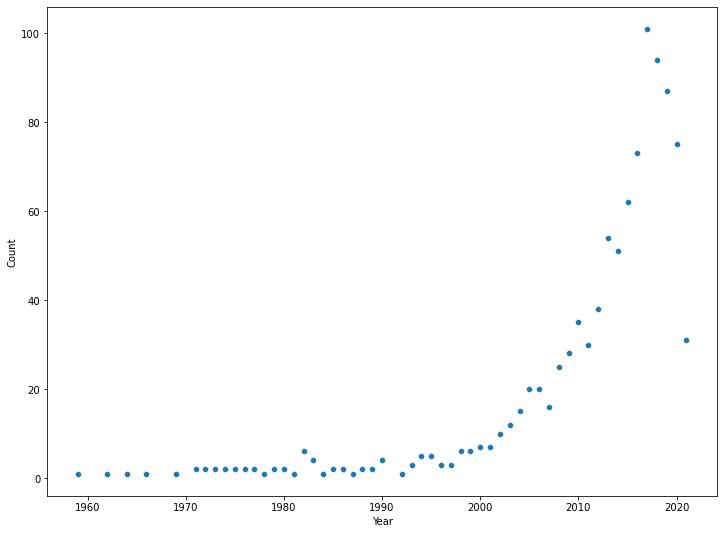

In [25]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=yearwise_release_df['Year'],y=yearwise_release_df['Count']);

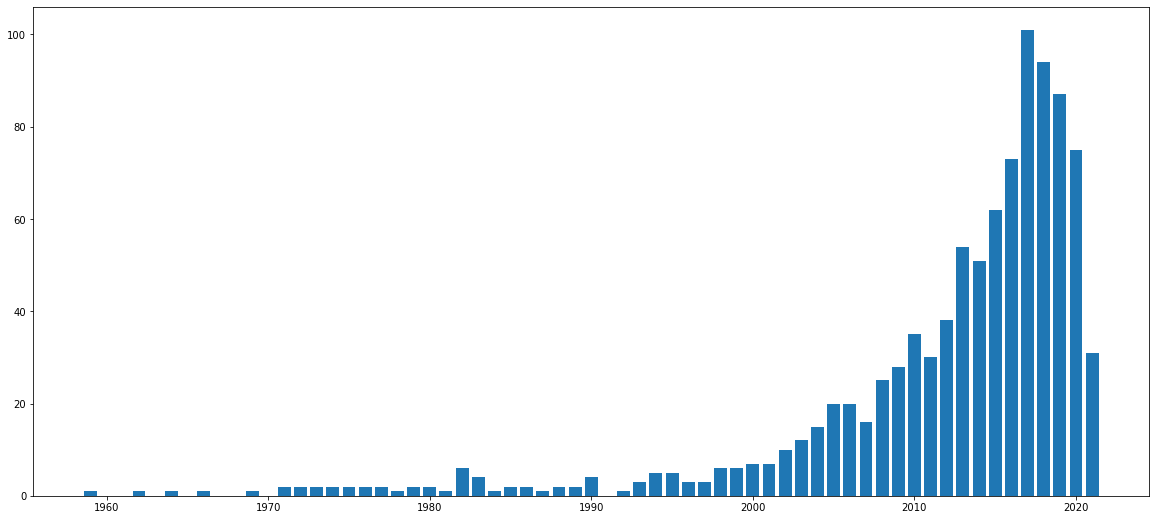

In [26]:
plt.figure(figsize=(20,9))
plt.bar(yearwise_release_df.Year, yearwise_release_df.Count);

### Create a heatmap with yearwise release count and country releases.
think about it

### TV Shows 

In [27]:
release_2017_df = full_data_df[full_data_df['release_year']==2017]
release_2017_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
89,s90,TV Show,Mighty Raju,NaN,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",NaN,"September 9, 2021",2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan..."
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,"September 2, 2021",2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
128,s129,Movie,Agatha Christie's Crooked House,Gilles Paquet-Brenner,"Glenn Close, Terence Stamp, Max Irons, Gillian...",NaN,"September 1, 2021",2017,PG-13,115 min,"Dramas, International Movies, Thrillers",When a detective investigates the death of his...
...,...,...,...,...,...,...,...,...,...,...,...,...
8753,s8754,Movie,Withdrawn,Adrian Murray,"Aaron Keogh, Molly Reisman, Dean Tardioli, Gre...",Canada,"May 1, 2018",2017,TV-MA,74 min,"Dramas, Independent Movies",Unable to pay bills and unwilling to change hi...
8758,s8759,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."
8765,s8766,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States","June 22, 2017",2017,R,81 min,Horror Movies,This four-part anthology of short horror films...
8786,s8787,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",2017,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...


In [28]:
movie_2017_df = release_2017_df[release_2017_df.type == 'Movie']
movie_2017_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,"September 2, 2021",2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
128,s129,Movie,Agatha Christie's Crooked House,Gilles Paquet-Brenner,"Glenn Close, Terence Stamp, Max Irons, Gillian...",NaN,"September 1, 2021",2017,PG-13,115 min,"Dramas, International Movies, Thrillers",When a detective investigates the death of his...
162,s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong","September 1, 2021",2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8746,s8747,Movie,Winnie,Pascale Lamche,NaN,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
8753,s8754,Movie,Withdrawn,Adrian Murray,"Aaron Keogh, Molly Reisman, Dean Tardioli, Gre...",Canada,"May 1, 2018",2017,TV-MA,74 min,"Dramas, Independent Movies",Unable to pay bills and unwilling to change hi...
8765,s8766,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States","June 22, 2017",2017,R,81 min,Horror Movies,This four-part anthology of short horror films...
8786,s8787,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",2017,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...


In [29]:
countrywise_release = movie_2017_df['country'].value_counts()
countrywise_release

United States                                 284
India                                          98
United Kingdom                                 35
Canada                                         22
Spain                                          18
                                             ... 
Cambodia                                        1
Argentina, Italy                                1
Chile, Peru                                     1
Argentina, France                               1
France, Netherlands, South Africa, Finland      1
Name: country, Length: 142, dtype: int64

In [33]:
countrywise_release_df = pd.DataFrame({'Year':countrywise_release.index, 'Count':countrywise_release.values})

In [46]:
top_10_count = countrywise_release_df.head(10)

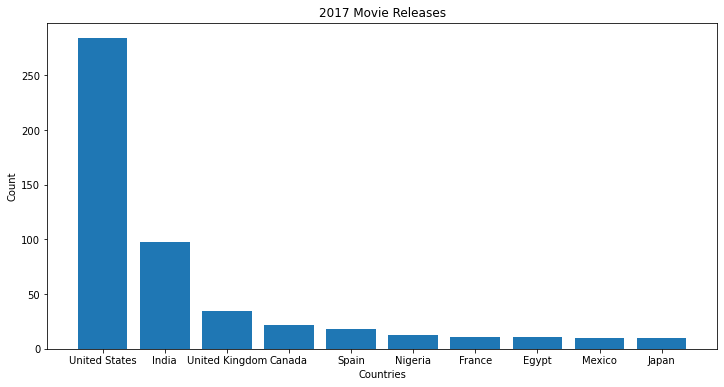

In [56]:
plt.figure(figsize=(12,6))
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('2017 Movie Releases')
plt.bar(top_10_count.Year, top_10_count.Count);

We see that in the year 2017, USA produced the maximum movies followed by India.
Let's find the number of total release of movies and TV Shows by United States on the same year.

In [65]:
us_release_2017_df = release_2017_df[release_2017_df.country == 'United States']
us_release_2017_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
171,s172,Movie,Same Kind of Different as Me,Michael Carney,"Greg Kinnear, Renée Zellweger, Djimon Hounsou,...",United States,"September 1, 2021",2017,PG-13,120 min,"Dramas, Faith & Spirituality",A wealthy couple whose marriage is on the rock...
445,s446,Movie,The Beguiled,Sofia Coppola,"Colin Farrell, Nicole Kidman, Kirsten Dunst, E...",United States,"July 16, 2021",2017,R,94 min,"Dramas, Independent Movies, Thrillers","During the Civil War, a wounded Union soldier ..."
446,s447,Movie,The Book of Henry,Colin Trevorrow,"Naomi Watts, Jaeden Martell, Jacob Tremblay, S...",United States,"July 16, 2021",2017,PG-13,105 min,Dramas,An 11-year-old vows to help a new neighbor who...
491,s492,Movie,Home Again,Hallie Meyers-Shyer,"Reese Witherspoon, Michael Sheen, Candice Berg...",United States,"July 8, 2021",2017,PG-13,97 min,"Comedies, Dramas, Romantic Movies",A newly single mom takes in three young male f...
511,s512,TV Show,Chelsea,NaN,NaN,United States,"July 6, 2021",2017,TV-MA,2 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies","It's not her first talk show, but it is a firs..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8716,s8717,Movie,Welcome to Willits,Trevor Ryan,"Bill Sage, Sabina Gadecki, Anastasia Baranova,...",United States,"February 6, 2018",2017,TV-MA,84 min,"Comedies, Horror Movies, Independent Movies",A marijuana farmer's extraterrestrial paranoia...
8726,s8727,TV Show,When Calls the Heart,NaN,"Erin Krakow, Daniel Lissing, Lori Loughlin, Ma...",United States,"December 29, 2018",2017,TV-PG,5 Seasons,TV Dramas,"Leaving behind her upper-crust city roots, a w..."
8730,s8731,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,"January 22, 2018",2017,R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w..."
8734,s8735,Movie,Who the F**k Is That Guy?,Drew Stone,Michael Alago,United States,"September 1, 2017",2017,TV-MA,78 min,"Documentaries, LGBTQ Movies, Music & Musicals",Take a ride through the life of record exec Mi...


**This above DataFrame has missed out multiple US movie/Tv-show releases because of the shows being done in multiple countries other than US.**
But, lets still see how many releases were shows and how many were movies?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


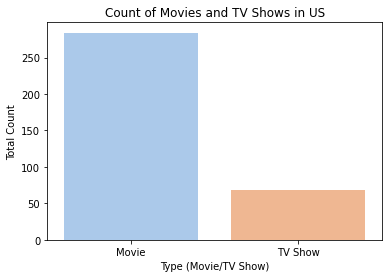

In [66]:
x = sns.countplot(us_release_2017_df.type, palette="pastel");
plt.title("Count of Movies and TV Shows in US")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count");
plt.show()

In [31]:
show_2017_df = release_2017_df[release_2017_df.type == 'TV Show']
show_2017_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
89,s90,TV Show,Mighty Raju,NaN,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",NaN,"September 9, 2021",2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan..."
511,s512,TV Show,Chelsea,NaN,NaN,United States,"July 6, 2021",2017,TV-MA,2 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies","It's not her first talk show, but it is a firs..."
517,s518,TV Show,Good Morning Call,NaN,"Haruka Fukuhara, Shunya Shiraishi, Dori Sakura...",Japan,"July 6, 2021",2017,TV-14,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",A high school girl finally gets her own apartm...
911,s912,TV Show,Sab Jholmaal Hai,Vijay Roche,NaN,India,"May 7, 2021",2017,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","In this madcap comedy, two mischievous cats, a..."
1125,s1126,TV Show,Murder Maps,NaN,Nicholas Day,United Kingdom,"April 1, 2021",2017,TV-MA,2 Seasons,"British TV Shows, Crime TV Shows, Docuseries",Dramatic reenactments paired with archival sou...
...,...,...,...,...,...,...,...,...,...,...,...,...
8588,s8589,TV Show,Tientsin Mystic,NaN,"Li Xian, Zhang Ming En, Wang Zixuan, Chen Yumi...",China,"February 9, 2018",2017,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In an otherworldly river town, a policeman fol..."
8633,s8634,TV Show,Trotsky,NaN,"Konstantin Khabenskiy, Olga Sutulova, Max Matv...",Russia,"December 10, 2018",2017,TV-MA,1 Season,"International TV Shows, TV Dramas",The complex historical figure of Leon Trotsky ...
8690,s8691,TV Show,Wake Up,NaN,"Jag Huang, Chris Wu, Tiffany Hsu, Michael Huan...",NaN,"March 31, 2018",2017,TV-14,2 Seasons,"International TV Shows, TV Dramas","After taking the blame for a patient death, an..."
8726,s8727,TV Show,When Calls the Heart,NaN,"Erin Krakow, Daniel Lissing, Lori Loughlin, Ma...",United States,"December 29, 2018",2017,TV-PG,5 Seasons,TV Dramas,"Leaving behind her upper-crust city roots, a w..."


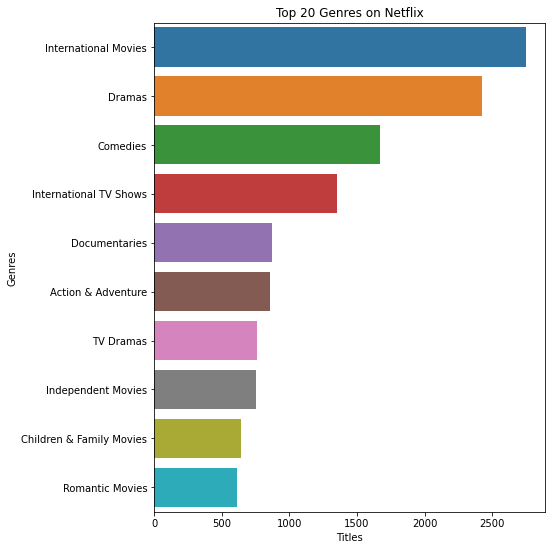

In [70]:
filtered_genres = full_data_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [71]:
filtered_genres

title
Dick Johnson Is Dead               Documentaries
Blood & Water             International TV Shows
Blood & Water                          TV Dramas
Blood & Water                       TV Mysteries
Ganglands                         Crime TV Shows
                                  ...           
Zoom                    Children & Family Movies
Zoom                                    Comedies
Zubaan                                    Dramas
Zubaan                      International Movies
Zubaan                          Music & Musicals
Length: 19323, dtype: object